In [26]:
import pandas as pd
import math

df = pd.read_csv('diamonds.csv')
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Implementation Part 1 (50%): Diamond Prices

## 1. Give an overview of the dataset structure by answering those questions:

### How many samples and features are in the dataset?

In [27]:
print('Samples:', len(df))
print('Features:',len(df.columns))

Samples: 53940
Features: 10


### What are the feature data types?

In [28]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

### Are diamonds balanced across color, cut and clarity? (Hint: roughly 1:1 means balanced, e.g. 1:2 is a “1:2 imbalance”)

In [33]:
color_df = df.groupby('color').size().to_frame('count')
color_df['balance'] = color_df['count'] / color_df['count'].min()
color_df = color_df.sort_values('balance')
print(color_df)

       count   balance
color                 
J       2808  1.000000
I       5422  1.930912
D       6775  2.412749
H       8304  2.957265
F       9542  3.398148
E       9797  3.488960
G      11292  4.021368


Compared to the lowest count J, every class has at least an imbalance of 1:2 and most of them 1:3.
E and F for example are balanced if viewed separately without the other colors.

In [31]:
cut_df = df.groupby('cut').size().to_frame('count')
cut_df['balance'] = cut_df['count'] / cut_df['count'].min()
cut_df = cut_df.sort_values('balance')
print(cut_df)

           count    balance
cut                        
Fair        1610   1.000000
Good        4906   3.047205
Very Good  12082   7.504348
Premium    13791   8.565839
Ideal      21551  13.385714


Compared to the fair cut every class is imbalanced and ideal has an imbalance of 1:13

In [30]:
clarity_df = df.groupby('clarity').size().to_frame('count')
clarity_df['balance'] = clarity_df['count'] / clarity_df['count'].min()
clarity_df = clarity_df.sort_values('balance')
print(clarity_df)

         count    balance
clarity                  
I1         741   1.000000
IF        1790   2.415655
VVS1      3655   4.932524
VVS2      5066   6.836707
VS1       8171  11.026991
SI2       9194  12.407557
VS2      12258  16.542510
SI1      13065  17.631579


The classes are extremely imbalanced, I1 vs VS2 has even an imbalance of 1:17.

## 2. Visualize diamond prices using a histogram, boxplot and density plot.

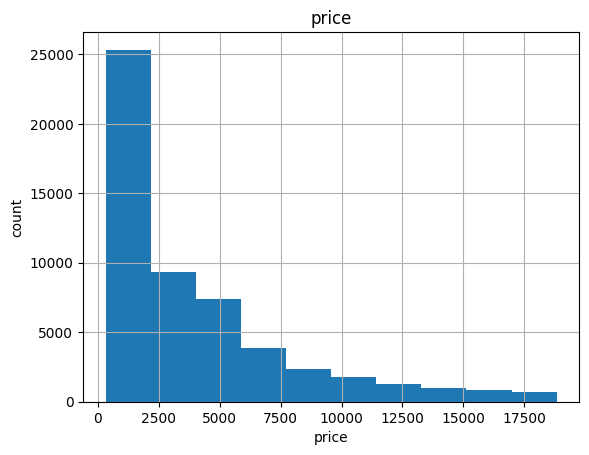

In [45]:
axarr = df.hist('price')
for ax in axarr.flatten():
    ax.set_xlabel("price")
    ax.set_ylabel("count")

Text(0, 0.5, 'count')

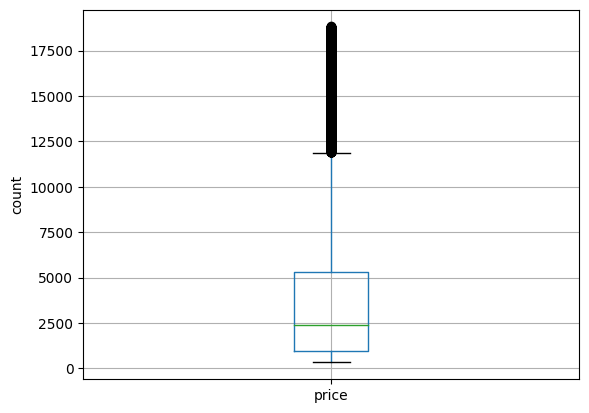

In [50]:
axarr = df.boxplot('price')
axarr.set_ylabel("count")

Text(0.5, 0, 'price')

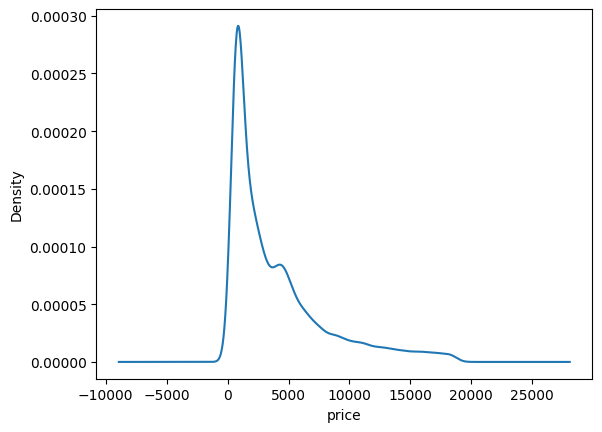

In [52]:
axarr = df['price'].plot.density()
axarr.set_xlabel("price")

###  Answer this question: Is there trend visible in those plots? If yes, which is it and in which plots can you see it?

There exist much more cheap diamonds up to 2500 and the amount decreases exponential which is very good visible in the boxplot and histogram.
The boxplot also shows that there are many outliers beyond 12000. 75% of the diamonds are below 5000.

## 3. Calculate and state the mean, median, standard deviation, median absolute deviation (MAD), 1st and 3rd quartile (Q1 and Q3), and inner quartile range of the diamond price.
• If you are not familiar with those functions: use Google, Wikipedia,
etc.
• Required commands are all in the provided script.

In [42]:
print('Mean:', round(df['price'].mean(), 2))
print('Median:', round(df['price'].median(), 2))
print('STD: ', round(df['price'].std(), 2))
# the mad() function is deprecated
print('MAD: ', round((df['price'] - df['price'].mean()).abs().mean(), 2))
print('Q1:', df['price'].quantile(0.25))
print('Q3:', df['price'].quantile(0.75))
print('Inner quartile: ', df['price'].quantile(0.75) - df['price'].quantile(0.25))

Mean: 3932.8
Median: 2401.0
STD:  3989.44
MAD:  3031.6
Q1: 950.0
Q3: 5324.25
Inner quartile:  4374.25


## 4. Plot the diamond price against the carat values as a scatterplot. Answer this question:
Hint: plotting many samples will be slow. Changing the plot symbol to '.' will cause a speedup.

<AxesSubplot: xlabel='carat', ylabel='price'>

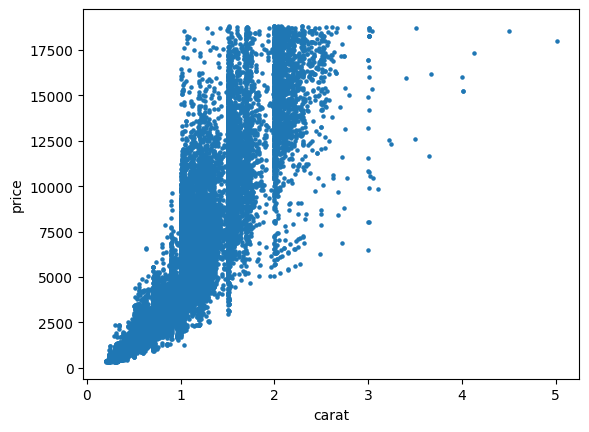

In [12]:
df.plot.scatter(x='carat', y='price', marker='.')

### Is there a trend visible in the plot? If yes, which is it?

There is no direct connection between price and carat.
It depends on more than the carat feature when you look on the spread of the points.
Tendencial more carat leads to higher prices.

## 5. Analyze the correlation between diamond price and diamond x, y, and z dimensions.

### Create pairwise plots for these features.

          price         x         y         z
price  1.000000  0.884435  0.865421  0.861249
x      0.884435  1.000000  0.974701  0.970772
y      0.865421  0.974701  1.000000  0.952006
z      0.861249  0.970772  0.952006  1.000000


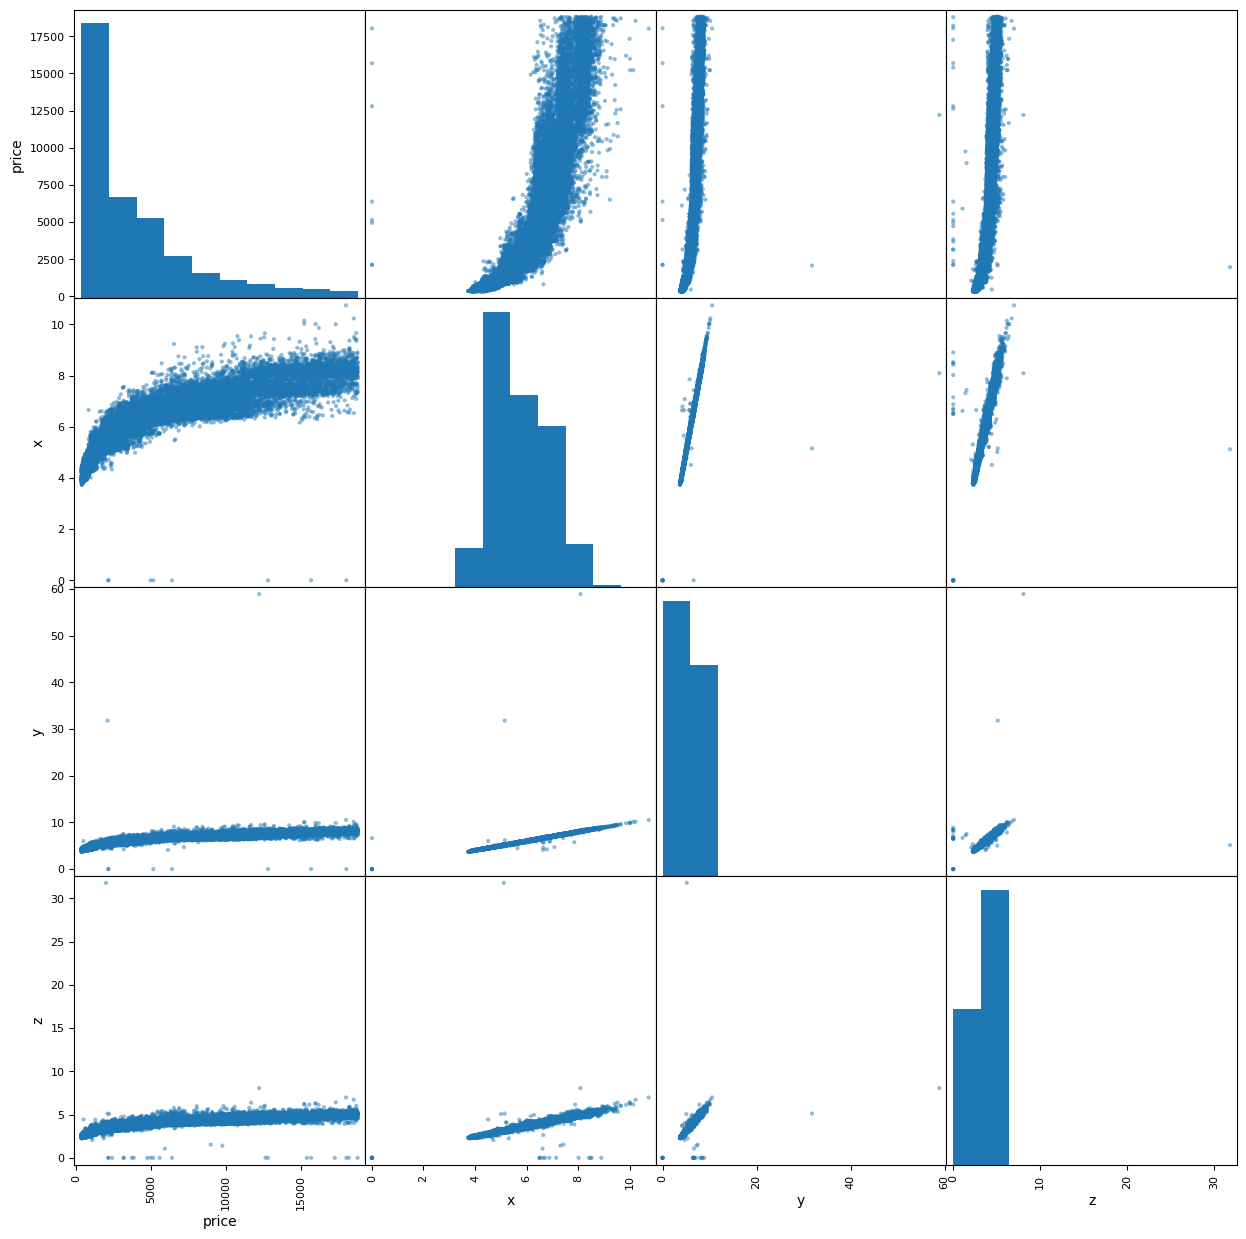

In [55]:
pairwise_plot = df[['price', 'x', 'y', 'z']]
pd.plotting.scatter_matrix(pairwise_plot, figsize=(15,15))
print(pairwise_plot.corr())


### Is there a trend visible between x, y, and z? If yes, which is it?

Yes the dimensions all have a very high linear correlation, there is nearly a straight line.

### Is there a trend visible between the dimensions and the price? If yes, which is it?
• Hint: if you don’t know what a linear relation is (Google it!):
– Linear correlation: feature A low –> feature B low, and feature
A high –> feature B high.
– (Inverse) linear correlation is also a linear correlation: feature
A low –> feature B high, and feature A high –> feature B low:
inverse linear correlation. Usually also just called linear correlation.
– When plotting feature A against feature B and their points form
a “straight line”, then it’s a linear relationship between A and B
= linear correlation.

The larger the dimensions the greater the price.
X spreads more than y or z.
There is also a large linear correlation between price and dimension, at least 86%.

## 6. Analyze diamond prices per diamond color.

### Create boxplots showing diamond price boxes for each diamond color (all boxes should be in one figure).

<AxesSubplot: title={'center': 'price'}, xlabel='color'>

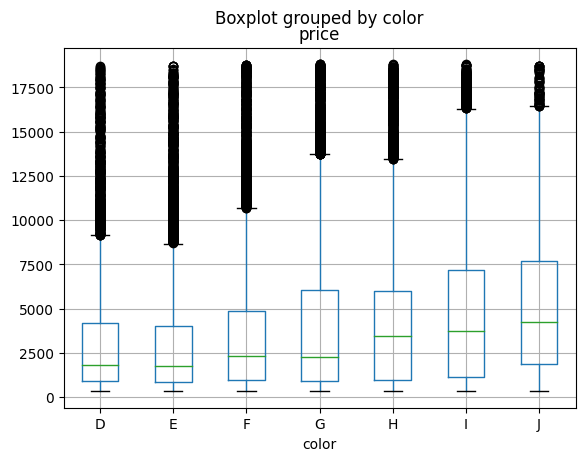

In [15]:
df.boxplot('price', by='color')

### Create densityplots showing diamond prices for each diamond color (all densities should be in one figure).

color
D    AxesSubplot(0.125,0.11;0.775x0.77)
E    AxesSubplot(0.125,0.11;0.775x0.77)
F    AxesSubplot(0.125,0.11;0.775x0.77)
G    AxesSubplot(0.125,0.11;0.775x0.77)
H    AxesSubplot(0.125,0.11;0.775x0.77)
I    AxesSubplot(0.125,0.11;0.775x0.77)
J    AxesSubplot(0.125,0.11;0.775x0.77)
Name: price, dtype: object

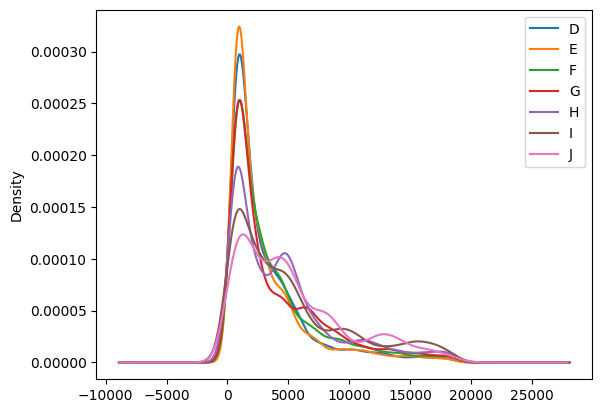

In [16]:
df.groupby('color')['price'].plot.density(legend=True)

### Answer this question: is there a trend visible? If yes, which one?

Most of the diamond colors are sold for approximately the same price.
Depending on the color there exist more or less diamonds.
Type E for example looks very stable and there are no peaks.

## 7. Use vectorized commands (= no loops!) to answer these questions:

### How many diamonds have a price above 9500?

In [17]:
len(df[df['price'] > 9500])

5734

### How many diamonds have a price above 9500 and have color “D”?

In [18]:
len(df[(df['price'] > 9500) & (df['color'] == 'D')])

461

### What is the mean and std of the price of all color “D” diamonds with cut “Fair”?

In [19]:
df[(df['cut'] == 'Fair') & (df['color'] == 'D')]['price'].mean()

4291.061349693252

In [20]:
df[(df['cut'] == 'Fair') & (df['color'] == 'D')]['price'].std()

3286.1142381749964

### What is the median and mad of the price of all color “J” diamonds with cut “Ideal”?

In [21]:
dfIdeal = df[(df['cut'] == 'Ideal') & (df['color'] == 'J')]['price']
print('Median: ')
print(dfIdeal.median())
print('Ideal: ')
print((dfIdeal - dfIdeal.mean()).abs().mean())

Median: 
4096.0
Ideal: 
3467.5866823780293


### Create two copies of the dataframe that contains only the price and carat feature. Apply a log with base 10 to both features in one of those dataframes, and square (x' = x²) the features in the other dataframe. What is the mean and std of the transformed features in both dataframes?

In [22]:
dfSquare = df[['carat', 'price']].applymap(func=lambda x: x ** 2)
print(dfSquare.mean())
print(dfSquare.std())

carat    8.613903e-01
price    3.138225e+07
dtype: float64
carat    1.056506e+00
price    6.049189e+07
dtype: float64


In [23]:
dfLog = df[['carat', 'price']].applymap(func=math.log10)
print(dfLog.mean())
print(dfLog.std())

carat   -0.171532
price    3.381751
dtype: float64
carat    0.253987
price    0.440657
dtype: float64
